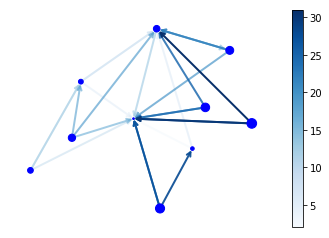

In [12]:
import matplotlib as mpl
import matplotlib.pyplot as plt
import networkx as nx

G = nx.generators.directed.random_k_out_graph(10, 3, 0.5)
pos = nx.layout.spring_layout(G)

node_sizes = [3 + 10 * i for i in range(len(G))]
M = G.number_of_edges()
edge_colors = range(2, M + 2)
edge_alphas = [(5 + i) / (M + 4) for i in range(M)]

nodes = nx.draw_networkx_nodes(G, pos, node_size=node_sizes, node_color='blue')
edges = nx.draw_networkx_edges(G, pos, node_size=node_sizes, arrowstyle='->',
                               arrowsize=10, edge_color=edge_colors,
                               edge_cmap=plt.cm.Blues, width=2)
# set alpha value for each edge
for i in range(M):
    edges[i].set_alpha(edge_alphas[i])

pc = mpl.collections.PatchCollection(edges, cmap=plt.cm.Blues)
pc.set_array(edge_colors)
plt.colorbar(pc)

ax = plt.gca()
ax.set_axis_off()
plt.show()

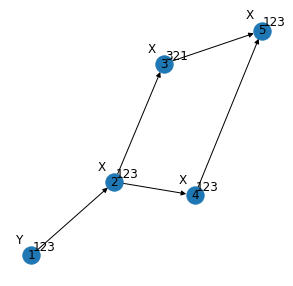

In [192]:
from matplotlib import pyplot as plt
import networkx as nx
G = nx.DiGraph()
G.add_edge(1,2)
G.add_edge(2,3)
G.add_edge(2,4)
G.add_edge(4,5)
G.add_edge(3,5)
for v in G.nodes:
    G.nodes[v]['state']='X'
    G.nodes[v]['time']=123
G.nodes[1]['state']='Y'
G.nodes[3]['time']=321

for e in G.edges:
    G.edges[e]['state']='ABC'

pos = nx.spring_layout(G)


fig, ax = plt.subplots(figsize=(5,5))
nx.draw(G, pos, with_labels=True)
node_states= nx.get_node_attributes(G,'state',)
node_times = nx.get_node_attributes(G,'time')
#nx.draw_networkx_labels(G, pos, labels = node_labels)
times = nx.draw_networkx_labels(G, pos, labels = node_times)
states = nx.draw_networkx_labels(G, pos, labels = node_states)
#edge_labels = nx.get_edge_attributes(G,'state')
#nx.draw_networkx_edge_labels(G, pos, labels = edge_labels)
#plt.savefig('this.png')

r = fig.canvas.get_renderer()
trans = plt.gca().transData.inverted()
for node, t in times.items():
    x=t.get_position()[0]+0.1
    y=t.get_position()[1]+0.05
    pos=(x,y)
    t.set_position(pos)
    
for node, t in times.items():
    x=t.get_position()[0]+0.0025
    y=t.get_position()[1]+0.0025
    pos=(x,y)
    t.set_position(pos)

for node, t in states.items():
    x=t.get_position()[0]-0.1
    y=t.get_position()[1]+0.1
    pos=(x,y)
    t.set_position(pos)

plt.show()

In [13]:
from matplotlib import pyplot as plt
import networkx as nx
G = nx.DiGraph()
G.add_node(1, time='5pm')
G.add_nodes_from([3], time='2pm')
print(G.nodes)

[1, 3]


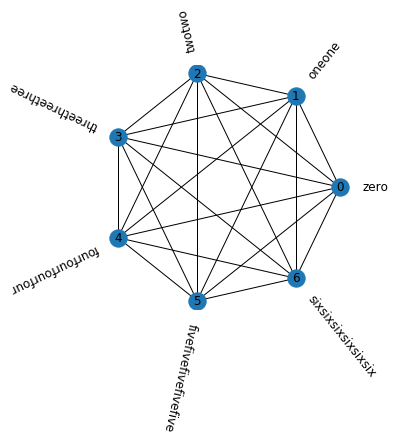

In [92]:
# https://stackoverflow.com/questions/43894987/networkx-node-labels-relative-position
%matplotlib inline
import numpy as np
import networkx as nx
import matplotlib.pyplot as plt

plt.rcParams['figure.figsize'] = [5, 5]

n = 7
G = nx.complete_graph(n)
node_list = sorted(G.nodes())
angle = []
angle_dict = {}
for i, node in zip(range(n),node_list):
    theta = 2.0*np.pi*i/n
    angle.append((np.cos(theta),np.sin(theta)))
    angle_dict[node] = theta
pos = {}
for node_i, node in enumerate(node_list):
    pos[node] = angle[node_i]

labels = {0:'zero',1:'oneone',2:'twotwo',3:'threethreethree',4:'fourfourfourfour',5:'fivefivefivefivefive',6:'sixsixsixsixsixsix'}

# figsize is intentionally set small to condense the graph
fig, ax = plt.subplots(figsize=(10,10))
margin=0.33
fig.subplots_adjust(margin, margin, 1.-margin, 1.-margin)
ax.axis('equal')

nx.draw(G,pos=pos,with_labels=True, ax=ax)
description = nx.draw_networkx_labels(G,pos,labels=labels)


r = fig.canvas.get_renderer()
trans = plt.gca().transData.inverted()
for node, t in description.items():
    bb = t.get_window_extent(renderer=r)
    bbdata = bb.transformed(trans)
    radius = 1.2+bbdata.width/2.
    position = (radius*np.cos(angle_dict[node]),radius* np.sin(angle_dict[node]))
    t.set_position(position)
    t.set_rotation(angle_dict[node]*360.0/(2.0*np.pi))
    t.set_clip_on(False)

plt.show()